In [1]:
import staircase as sc
import operator
import warnings

from imports import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import hotstepper as hs
#from hotstepper import Steps, Step
from hotstepper.utilities import get_epoch_start,date_to_float_bulk
from hotstepper import Bases, Basis

import hotstepper.samples as samples

warnings.filterwarnings("ignore")


In [ ]:
hs.utilities.is_date_time(pd.Timestamp(2020))

In [2]:
df = pd.read_csv(r"..//data/vessel_queue.csv", parse_dates=['enter', 'leave'], dayfirst=True)
vsteps = hs.Steps(use_datetime=True).add_direct(df.enter,df.leave)
queue = sc.Stairs(use_dates=True).layer(df.enter,df.leave)
#queue = queue.clip(upper=pd.Timestamp(2020,3,1))

In [ ]:
%%timeit -r 3 -n 3
vsteps = hs.Steps(use_datetime=True).add_direct(df.enter,df.leave)

In [ ]:
%%timeit -r 3 -n 3
queue = sc.Stairs(use_dates=True).layer(df.enter,df.leave)

In [ ]:
#p = np.arange(pd.Timestamp(2020,1,1),pd.Timestamp(2020,3,1),pd.Timedelta(hours=1)).astype(pd.Timestamp)

fig,(ax,ax2) = plt.subplots(nrows=2,figsize=(24,8))

#vsteps = vsteps.clip(ubound=pd.Timestamp(2020,3,1))
vsteps_smooth = vsteps.copy()
vsteps_smooth.rebase(hs.Basis(hs.Bases.logit))
#vsteps.rebase()
vsteps.plot(ax=ax)
vsteps_smooth.smooth_plot(ax=ax,color='g')

delta_steps = vsteps - vsteps_smooth
delta_steps.plot(ax=ax2)


In [ ]:
delta_steps.histogram_plot()

In [ ]:
clip_step_end = hs.Step(end=pd.Timestamp(2020,1,10))
steps_end = hs.Steps(True).add_direct([None],[pd.Timestamp(2020,1,10)])
clip_step_start = hs.Step(start=pd.Timestamp(2020,5,1))

ax = vsteps.clip(ubound=pd.Timestamp(2020,1,10)).plot(color='g')
(vsteps*clip_step_end).plot(ax=ax,color='black')
(vsteps*steps_end).plot(ax=ax,color='r')


In [ ]:
s3 = hs.Step(end=13,weight=3)
#s3.step([get_epoch_start(False),14])
ax = s3.plot(method='function')
(s3*s3).plot(ax=ax,color='r')

In [ ]:
vsteps.summary()

In [ ]:
ax = vsteps.plot()
vsteps.smooth_plot(ax=ax,color='g')

In [ ]:
p = np.arange(vsteps.first(),vsteps.last(),pd.Timedelta(minutes=10)).astype(pd.Timestamp)
p3 = np.arange(vsteps.first().to_numpy(), vsteps.last().to_numpy(),np.timedelta64(10, 'm'),dtype='datetime64[ns]')
p2 = np.arange(vsteps.first(),vsteps.last(),pd.Timedelta(minutes=10)).astype(float)

In [ ]:
%%timeit -r 5 -n 5
vsteps.fast_step(p)

In [ ]:
%%timeit -r 5 -n 5
queue(p)

In [ ]:
fig,ax = plt.subplots(figsize=(24,6))

ax.step(p,vsteps[p])

In [ ]:
origin = pd.to_datetime("1970-1-1")

d = np.datetime64('1980-01-01T10:12')

fd = (d - origin.tz_localize(None)) / pd.Timedelta(1, "s")
fd

In [ ]:
fd*pd.Timedelta(1, "s") + origin

In [ ]:
vsteps[vsteps.first():vsteps.last():pd.Timedelta(minutes=10)]

In [ ]:
vsteps.fast_step(p,side='left')

In [ ]:
import datetime
#print(get_ts(datetime.datetime(1980,1,1,10,12)),'\n',get_ts(pd.Timestamp(1980,1,1,10,12)))
print(hs.utilities.date_to_float_bulk(datetime.datetime(1980,1,1,10,12)),'\n',hs.utilities.date_to_float_bulk(pd.Timestamp(1980,1,1,10,12)))

print(hs.utilities.date_to_float_bulk(np.datetime64('nat')),'\n',hs.utilities.date_to_float_bulk(pd.Timestamp(1980,1,1,10,12)))


<AxesSubplot:>

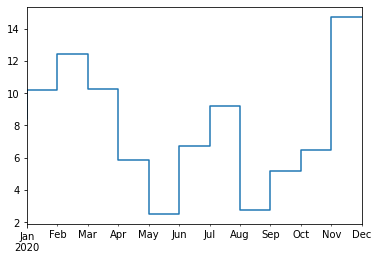

In [3]:
vs = vsteps.series().resample('1M',label='right',closed='right').mean()
vs.plot(drawstyle='steps')

In [4]:
s = vs.index.values.copy()
e = vs.index.values.copy()
v = vs.values

In [ ]:
s

In [ ]:
#s[0] = None
#np.datetime64('2020-01-01')
#s = np.insert(s,0,None)
#s = np.append(s,np.datetime64('2020-12-31'))

#v = np.insert(v,0,s[0])
#v = np.append(v,0)

#v[0] = v[1]

In [ ]:
v

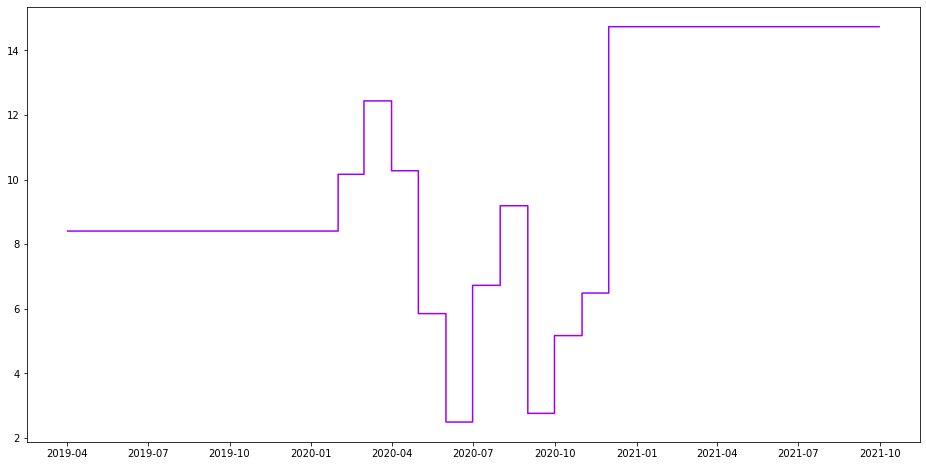

In [5]:
vs_resample = hs.Steps.read_array(start=s,weight=v,convert_delta=True)
#vs_resample._all_data
ax = vs_resample.plot(method='function')
#vsteps.plot(ax=ax,color='g')